# Load data and perform EDA

In [1]:
import pandas as pd

df = pd.read_csv('property_sales_canberra.csv')

In [2]:
df.head()

datesold     price           suburb  postcode  lat  lon  parking  \
0   9/06/2000  223000.0         Nicholls      2913  NaN  NaN        2   
1   1/01/2001  350000.0        Ngunnawal      2913  NaN  NaN        1   
2  11/12/2003  550000.0           Weston      2611  NaN  NaN        2   
3  21/09/2005  276000.0  Isabella Plains      2905  NaN  NaN        1   
4   1/11/2005  400000.0           Conder      2906  NaN  NaN        2   

   bathrooms  bedrooms propertyType suburbid  
0        2.0         4        house   ACT708  
1        NaN         3        house   ACT706  
2        NaN         4        house   ACT441  
3        1.0         3        house   ACT612  
4        NaN         5        house   ACT613

In [3]:
df.shape

(43178, 11)

In [4]:
# all columns 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43178 entries, 0 to 43177
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datesold      43178 non-null  object 
 1   price         42435 non-null  float64
 2   suburb        43178 non-null  object 
 3   postcode      43178 non-null  int64  
 4   lat           42033 non-null  float64
 5   lon           42033 non-null  float64
 6   parking       43178 non-null  int64  
 7   bathrooms     42499 non-null  float64
 8   bedrooms      43178 non-null  int64  
 9   propertyType  43178 non-null  object 
 10  suburbid      43178 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 3.6+ MB


In [5]:
# numerical data 

df.describe()

price      postcode           lat           lon       parking  \
count  4.243500e+04  43178.000000  42033.000000  42033.000000  43178.000000   
mean   6.037398e+05   2728.855644    -35.293447    149.096122      1.760017   
std    3.139764e+05    146.564444      0.091796      0.040526      0.937361   
min    5.000000e+04   2092.000000    -35.509975    148.921424      0.000000   
25%    4.300000e+05   2607.000000    -35.363857    149.067390      1.000000   
50%    5.390000e+05   2615.000000    -35.270536    149.099522      2.000000   
75%    6.760000e+05   2905.000000    -35.212323    149.130708      2.000000   
max    8.000000e+06   2914.000000    -35.138572    149.250290     31.000000   

          bathrooms      bedrooms  
count  42499.000000  43178.000000  
mean       1.643403      3.193501  
std        0.644463      0.990638  
min        1.000000      0.000000  
25%        1.000000      3.000000  
50%        2.000000      3.000000  
75%        2.000000      4.000000  
max       21.000000     14.000000

# Data cleaning and preprocessing

In [6]:
# check for null and duplicates

print(f"Number of rows that contain null values:\n{df.isnull().sum()}\n\n")

print(f"Duplicated rows: \n{df[df.duplicated(keep='first')]}") # do not take the first occurence

Number of rows that contain null values:
datesold           0
price            743
suburb             0
postcode           0
lat             1145
lon             1145
parking            0
bathrooms        679
bedrooms           0
propertyType       0
suburbid           0
dtype: int64


Duplicated rows: 
         datesold     price     suburb  postcode        lat         lon  \
20745   2/03/2016  630000.0  Moncrieff      2914        NaN         NaN   
25137   2/03/2017  385000.0   Chisholm      2905 -35.427042  149.117373   
29292   8/01/2018  875000.0    Calwell      2905 -35.444985  149.099545   
38512   7/02/2015  360000.0    Torrens      2607 -35.373889  149.087976   
40057  23/01/2017  720000.0   Kingston      2604 -35.317160  149.143377   
42411  11/12/2018  320000.0  Gungahlin      2912 -35.181563  149.130712   
42478  15/01/2019  309950.0  Gungahlin      2912 -35.181563  149.130712   
42958  12/07/2019  339950.0  Gungahlin      2912 -35.182384  149.131132   

       parking  bat

In [7]:
# delete null and duplicate rows

df = df.drop_duplicates()
print(df.shape)

df = df.dropna()
print(df.shape)

(43170, 11)
(41116, 11)


In [8]:
df.isnull().sum()

datesold        0
price           0
suburb          0
postcode        0
lat             0
lon             0
parking         0
bathrooms       0
bedrooms        0
propertyType    0
suburbid        0
dtype: int64

In [9]:
df[df.duplicated()]

Empty DataFrame
Columns: [datesold, price, suburb, postcode, lat, lon, parking, bathrooms, bedrooms, propertyType, suburbid]
Index: []

# Data visualization

<AxesSubplot:>

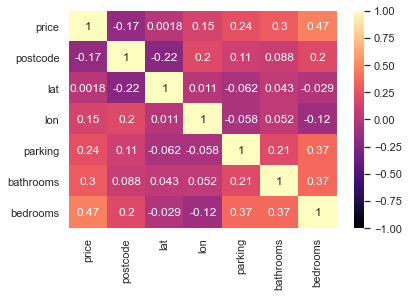

In [10]:
# check correlation between columns

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set();

corr = df.corr()

sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='magma')

Text(0, 0.5, 'Frequency')

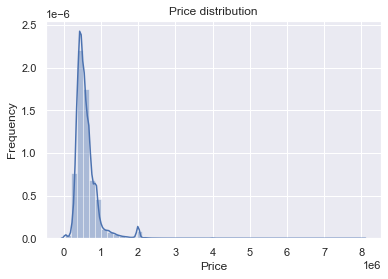

In [11]:
# distribution plot

sns.distplot(df['price'])
plt.title('Price distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

In [12]:
def bar_plot(column_name):
    df[column_name].value_counts().plot(kind='bar')
    plt.title(f'Number of {column_name.title()}')
    plt.xlabel(column_name.title())
    plt.ylabel('Count')
    sns.despine

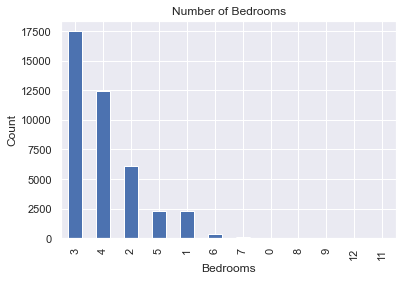

In [13]:
bar_plot('bedrooms')

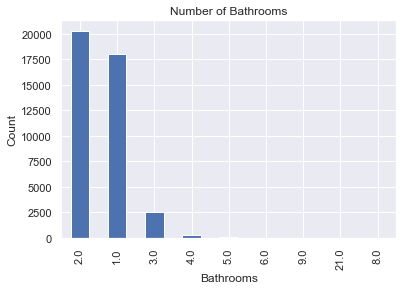

In [14]:
bar_plot('bathrooms')

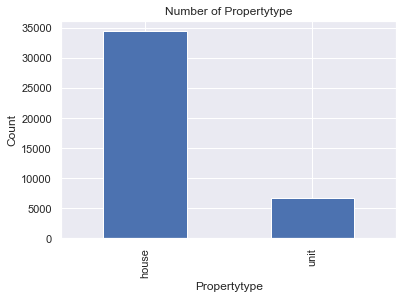

In [15]:
bar_plot('propertyType')

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

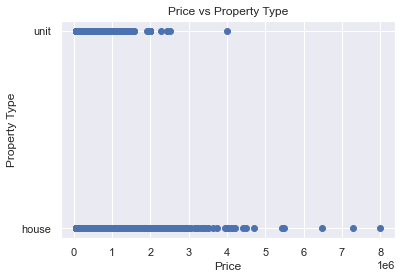

In [16]:
plt.scatter(df['price'], df['propertyType'])
plt.title('Price vs Property Type')
plt.xlabel('Price')
plt.ylabel('Property Type')
sns.despine

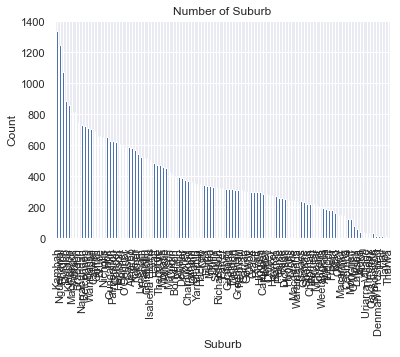

In [17]:
bar_plot('suburb')

In [18]:
df['suburb'].describe()

count      41116
unique       107
top       Kambah
freq        1336
Name: suburb, dtype: object

In [40]:
# save suburb series as a list and to a text file

suburb = df['suburb'].unique().tolist()
print(len(suburb))

with open('list_of_suburb.txt', 'w') as f:
    for item in suburb:
        f.write("%s\n" % item)

107


# Feature engineering

In [20]:
# remove lat, lon and suburb to avoid redundancy with postcode, suburbid and datesold not relevant
y = df['price']
X = df[['bedrooms', 'bathrooms', 'parking', 'suburb', 'propertyType']]

In [21]:
y.head()

37    350000.0
42    450000.0
44    250000.0
45    350000.0
46    290000.0
Name: price, dtype: float64

In [22]:
X.head()

bedrooms  bathrooms  parking           suburb propertyType
37         3        2.0        1           Gordon        house
42         3        2.0        2           Conder        house
44         3        1.0        1  Isabella Plains        house
45         3        2.0        1           Gordon        house
46         3        1.0        1           Conder        house

In [45]:
# do label encoding for propertyType

from sklearn.preprocessing import LabelEncoder
import pickle

lbl_proptype = LabelEncoder()
X['propertyType'] = lbl_proptype.fit_transform(X['propertyType'])

# save label encoder
with open('lbl_encoder_propType.pkl', 'wb') as file:  
    pickle.dump(lbl_proptype, file)

In [24]:
X['propertyType'].value_counts()

0    34470
1     6646
Name: propertyType, dtype: int64

In [46]:
# do label encoding for suburb

lbl_suburb = LabelEncoder()
X['suburb'] = lbl_suburb.fit_transform(X['suburb'])

# save label encoder
with open('lbl_encoder_suburb.pkl', 'wb') as file:  
    pickle.dump(lbl_suburb, file)

In [26]:
X['suburb'].value_counts()

60    1336
75    1246
43    1072
29     885
61     860
      ... 
92      16
25      15
49      14
93      10
94       2
Name: suburb, Length: 107, dtype: int64

In [27]:
X.head()

bedrooms  bathrooms  parking  suburb  propertyType
37         3        2.0        1      43             0
42         3        2.0        2      19             0
44         3        1.0        1      57             0
45         3        2.0        1      43             0
46         3        1.0        1      19             0

# Model training and evaluation

ref: https://towardsdatascience.com/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f

In [28]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model 1: linear regression

In [29]:
# evaluation
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def train_pred_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def mserr(y_pred, model):
    mse = mean_squared_error(y_test, y_pred)
    score = model.score(X_test, y_test)
    return mse, score

In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
y_pred_lr = train_pred_model(lr)
print(f"y_pred linear regression: {y_pred_lr}")

mse_lr, score_lr = mserr(y_pred_lr, lr)
print(f"Mean squared error linear regression: {mse_lr}")
print(f"R2 coefficient score linear regression: {score_lr}")

# cross validation score 
print(f"Cross validation score linear regression: {cross_val_score(lr, X_train, y_train, cv=3)}")

y_pred linear regression: [439082.99345122 221571.61624788 747849.47516561 ... 571975.5752375
 538650.11717439 272326.25667531]
Mean squared error linear regression: 72903484522.30562
R2 coefficient score linear regression: 0.24291145327084707
Cross validation score linear regression: [0.24547975 0.23655748 0.26217013]


## Model 2: gradient boosting regressor

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, max_depth=5)
y_pred_gbr = train_pred_model(gbr)
print(f"y_pred gradient boosting regressor: {y_pred_gbr}")

mse_gbr, score_gbr = mserr(y_pred_gbr, gbr)
print(f"Mean squared error gradient boosting regressor: {mse_gbr}")
print(f"R2 coefficient score gradient boosting regressor: {score_gbr}")

# cross validation score 
print(f"Cross validation score gradient boosting regressor: {cross_val_score(gbr, X_train, y_train, cv=3)}")

y_pred gradient boosting regressor: [355211.68670471 311188.4531317  639955.07785067 ... 621557.06858277
 496874.7053535  356382.44879802]
Mean squared error gradient boosting regressor: 36890461061.680305
R2 coefficient score gradient boosting regressor: 0.616899716983889
Cross validation score gradient boosting regressor: [0.56879101 0.55218569 0.59274074]


## Model 3: ridge regression (to shirink the regression coefs of linear reg to zero)

In [32]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=0.1)
y_pred_rr = train_pred_model(rr)
print(f"y_pred ridge regressor: {y_pred_rr}")

mse_rr, score_rr = mserr(y_pred_rr, rr)
print(f"Mean squared error ridge regressor: {mse_rr}")
print(f"R2 coefficient score ridge regressor: {score_rr}")

# cross validation score 
print(f"Cross validation score ridge regressor: {cross_val_score(rr, X_train, y_train, cv=3)}")

y_pred ridge regressor: [439081.86164713 221574.41544489 747849.2148128  ... 571976.10835525
 538650.85911155 272326.27243694]
Mean squared error ridge regressor: 72903483190.54387
R2 coefficient score ridge regressor: 0.24291146710093448
Cross validation score ridge regressor: [0.24547989 0.23655752 0.26216997]


## Model 4: k-neighbours regressor

In [33]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=40)
y_pred_knr = train_pred_model(knr)
print(f"y_pred k-neighbours regressor: {y_pred_knr}")

mse_knr, score_knr = mserr(y_pred_knr, knr)
print(f"Mean squared error k-neighbours regressor: {mse_knr}")
print(f"R2 coefficient score k-neighbours regressor: {score_knr}")

# cross validation score 
print(f"Cross validation score k-neighbours regressor: {cross_val_score(knr, X_train, y_train, cv=3)}")

y_pred k-neighbours regressor: [435073.75  309080.    548375.    ... 627077.475 580637.5   361112.5  ]
Mean squared error k-neighbours regressor: 40359687316.58089
R2 coefficient score k-neighbours regressor: 0.5808724752024116
Cross validation score k-neighbours regressor: [0.5292756  0.52495632 0.56061053]


## Model 5: random forest regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=20, random_state=42)
y_pred_rfr = train_pred_model(rfr)
print(f"y_pred random forest regressor: {y_pred_rfr}")

mse_rfr, score_rfr = mserr(y_pred_rfr, rfr)
print(f"Mean squared error random forest regressor: {mse_rfr}")
print(f"R2 coefficient score random forest regressor: {score_rfr}")

# cross validation score 
print(f"Cross validation score random forest regressor: {cross_val_score(rfr, X_train, y_train, cv=3)}")

y_pred random forest regressor: [405667.26142455 313882.43545376 578140.35922651 ... 659363.75109313
 569381.27851975 367477.1762615 ]
Mean squared error random forest regressor: 36570592377.03023
R2 coefficient score random forest regressor: 0.6202214912336754
Cross validation score random forest regressor: [0.52701487 0.52299166 0.56315468]


In [44]:
X_train.head(1)

bedrooms  bathrooms  parking  suburb  propertyType
41402         1        1.0        1     102             1

## Comparison between models

In [35]:
print(f"R2 coefficient score lr: {score_lr}")
print(f"R2 coefficient score gbr: {score_gbr}")
print(f"R2 coefficient score rr: {score_rr}")
print(f"R2 coefficient score knr: {score_knr}")
print(f"R2 coefficient score rfr: {score_rfr}")

R2 coefficient score lr: 0.24291145327084707
R2 coefficient score gbr: 0.616899716983889
R2 coefficient score rr: 0.24291146710093448
R2 coefficient score knr: 0.5808724752024116
R2 coefficient score rfr: 0.6202214912336754


## Note: use random forest regressor as final model (highest accuracy)

In [36]:
# save the best model

with open('rfr_model_0.62acc.pkl', 'wb') as file:  
    pickle.dump(rfr, file)

References: 

https://github.com/jupyter-widgets/ipywidgets/issues/2523

https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#Image

https://github.com/PrajwalPrashanth/fastai2-binder-voila-deployment